In [3]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

import torch

In [4]:
def nss(beta, maturity, lamb=0.0609):
    return beta[0] + beta[1] * ( (1 - math.exp(-lamb * maturity)) / (lamb * maturity)) + beta[2] * ( (1 - math.exp(-lamb * maturity)) / (lamb * maturity) - math.exp(-lamb * maturity))

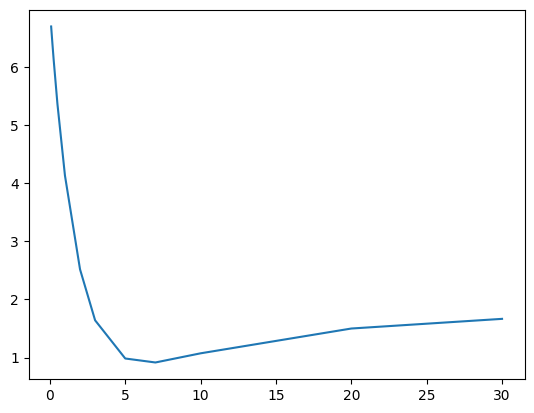

In [5]:
lst = []
maturities = [1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30]

for maturity in maturities:
    lst.append(nss([2, 5, -10], maturity, lamb=0.5))

plt.plot(maturities, lst)

# IN LAYER WILL CONSIST OF 8 ELEMENTS (COEFS OF 8 BASIS SPLINES)
# OUT LAYER WILL CONSIST OF 4 ELEMENTS (BETA_0, BETA_1, BETA_2, LAMBDA)

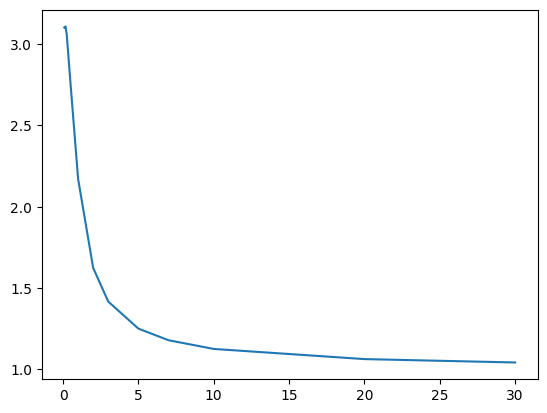

In [13]:
def nss(coef=torch.tensor([1, 2, 3, 4]), maturity=torch.tensor([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])):
    term1 = (1 - torch.exp(-coef[3] * maturity)) / (coef[3] * maturity)
    term2 = term1 - torch.exp(-coef[3] * maturity)
    return coef[0] + coef[1] * term1 + coef[2] * term2

def nss_2d(arr, maturity=torch.tensor([1/12, 2/12, 3/12, 6/12, 1, 2, 3, 5, 7, 10, 20, 30])):
    lst = []
    for i in range(len(arr)):
        lst.append(nss(coef=arr[i]))

    ts = torch.stack(lst)
    return ts 

yld = nss()
plt.plot(maturities, yld)

In [12]:
yld

tensor([3.1024, 3.1091, 3.0570, 2.7557, 2.1722, 1.6238, 1.4166, 1.2500, 1.1786,
        1.1250, 1.0625, 1.0417])

In [8]:
yld

tensor([3.1024, 3.1091, 3.0570, 2.7557, 2.1722, 1.6238, 1.4166, 1.2500, 1.1786,
        1.1250, 1.0625, 1.0417], dtype=torch.float64)

In [14]:
df = pd.DataFrame({
    'beta_0': [1, 2, 3, 4],
    'beta_1': [2, 3, 4, 1],
    'beta_2': [3, 1, 2, 4],
    'beta_3': [0.5, 0.7, 0.1, 0.2]
})
df.values

array([[1. , 2. , 3. , 0.5],
       [2. , 3. , 1. , 0.7],
       [3. , 4. , 2. , 0.1],
       [4. , 1. , 4. , 0.2]])

In [15]:
nss_2d(df.values)

tensor([[3.0197, 3.0372, 3.0526, 3.0876, 3.1151, 3.0570, 2.9202, 2.5896, 2.2948,
         1.9730, 1.4998, 1.3333],
        [4.9422, 4.8856, 4.8301, 4.6703, 4.3801, 3.9060, 3.5491, 3.0781, 2.8028,
         2.5700, 2.2857, 2.1905],
        [6.9917, 6.9833, 6.9750, 6.9500, 6.9001, 6.8006, 6.7020, 6.5086, 6.3218,
         6.0570, 5.3233, 4.8009],
        [5.0247, 5.0487, 5.0721, 5.1388, 5.2568, 5.4397, 5.5647, 5.6891, 5.7043,
         5.6203, 5.1538, 4.8214]])